# Analisis de incendios en Chile, Fuente CONAF
Ramo Minería de datos

In [1]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
# Importación de datos
cicatrices_incedios = pd.read_csv("https://raw.githubusercontent.com/Kiki1108/incendios/refs/heads/main/data/chile.csv")
cicatrices_incedios.head()

,fireID,season,code,cut_reg,region_conaf,name_conaf,area_conaf,ign_date_conaf,ctrl_date_conaf,lat,...,height,total_area,area_unchs,area_lows,area_mods,area_hs,firescar_poly,sev_poly,overlap,obs
0,ID10000,1986,CL-BI,8,Biobío,RAPELCO,51.0,1986-01-04,1986-01-04,-37.6710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID100000,2003,CL-ML,7,Maule,MAITENHUAPI,50.0,2003-02-09,2003-02-09,-35.3283,...,46.0,4.278272e+05,0.0,0.0,178748.092346,2.490791e+05,1.0,57.0,NaN,NaN
2,ID10002,1986,CL-BI,16,Ñuble,LAs chilcas,87.0,1986-02-03,1986-02-03,-36.6711,...,118.0,3.227681e+06,0.0,0.0,710373.072388,2.517308e+06,16.0,423.0,NaN,The ignition point is located in the current C...
3,ID100027,2003,CL-ML,7,Maule,LAS CATALINAS II,80.0,2003-02-15,2003-02-16,-35.5755,...,114.0,1.155078e+06,0.0,0.0,539904.116699,6.151739e+05,6.0,122.0,NaN,NaN
4,ID10003,1986,CL-BI,16,Ñuble,NAHUELTORO 1,53.0,1986-02-06,1986-02-06,-36.4938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ¿Qué significa cada una de las columnas?

<ul>
    <li><strong>fireID</strong> → Identificador único del incendio.</li>
    <li><strong>season</strong> → Año en que ocurrió el incendio.</li>
    <li><strong>code</strong> → Código del área donde ocurrió el incendio (probablemente código regional o de país).</li>
    <li><strong>cut_reg</strong> → Código de la región administrativa en la que ocurrió el incendio.</li>
    <li><strong>region_conaf</strong> → Nombre de la región según la CONAF (Corporación Nacional Forestal de Chile).</li>
    <li><strong>name_conaf</strong> → Nombre asignado al incendio en los registros de CONAF.</li>
    <li><strong>area_conaf</strong> → Área del incendio registrada por CONAF en hectáreas.</li>
    <li><strong>ign_date_conaf</strong> → Fecha de inicio del incendio.</li>
    <li><strong>ctrl_date_conaf</strong> → Fecha en que el incendio fue controlado.</li>
    <li><strong>lat, lon</strong> → Latitud y longitud del incendio.</li>
    <li><strong>firescar</strong> → Identificación de la cicatriz del incendio (probablemente en imágenes satelitales).</li>
    <li><strong>folderloc</strong> → Ubicación del archivo en la base de datos.</li>
    <li><strong>firescar_img_name</strong> → Nombre de la imagen satelital de la cicatriz del incendio.</li>
    <li><strong>prefire_img_name</strong> → Nombre de la imagen satelital previa al incendio.</li>
    <li><strong>postfire_img_name</strong> → Nombre de la imagen satelital posterior al incendio.</li>
    <li><strong>rdnbr_img_name</strong> → Nombre de la imagen con el índice RDNBR (relacionado con la severidad del incendio).</li>
    <li><strong>sev_img_name</strong> → Imagen de severidad del incendio.</li>
    <li><strong>firescar_vec_name</strong> → Nombre del archivo vectorial de la cicatriz del incendio.</li>
    <li><strong>sev_vec_name</strong> → Nombre del archivo vectorial de la severidad del incendio.</li>
    <li><strong>north_lat, south_lat</strong> → Latitud máxima y mínima del área afectada.</li>
    <li><strong>west_lon, east_lon</strong> → Longitud máxima y mínima del área afectada.</li>
    <li><strong>width, height</strong> → Dimensiones de la zona afectada (posiblemente en píxeles o metros).</li>
    <li><strong>total_area</strong> → Área total afectada (posiblemente en m²).</li>
    <li><strong>area_unchs</strong> → Área sin cambios después del incendio.</li>
    <li><strong>area_lows</strong> → Área con baja severidad de quemado.</li>
    <li><strong>area_mods</strong> → Área con severidad moderada.</li>
    <li><strong>area_hs</strong> → Área con alta severidad.</li>
    <li><strong>firescar_poly</strong> → Polígonos de cicatrices de incendios.</li>
    <li><strong>sev_poly</strong> → Polígonos de severidad del incendio.</li>
    <li><strong>overlap</strong> → Superposición con incendios previos o cicatrices antiguas.</li>
    <li><strong>obs</strong> → Observaciones adicionales sobre el incendio.</li>
</ul>


## Analisis del estado / calidad de los datos

In [3]:
# Analisis de missing values
cicatrices_incedios.isna().sum()

fireID                   0
season                   0
code                     0
cut_reg                  0
region_conaf             0
name_conaf               0
area_conaf               0
ign_date_conaf           0
ctrl_date_conaf          0
lat                      0
lon                      0
firescar                 0
folderloc             4097
firescar_img_name     4097
prefire_img_name      4097
postfire_img_name     4097
rdnbr_img_name        4097
sev_img_name          4097
firescar_vec_name     4097
sev_vec_name          4097
north_lat             4097
south_lat             4097
west_lon              4097
east_lon              4097
width                 4097
height                4097
total_area            4097
area_unchs            4097
area_lows             4097
area_mods             4097
area_hs               4097
firescar_poly         4097
sev_poly              4097
overlap              10064
obs                  11589
dtype: int64

In [4]:
# Revisión de duplicados
print(cicatrices_incedios.duplicated().sum())

0


In [5]:
# Descriptores generales
# Cantidad, media, desviación estandar, minimo, maximo, quartiles.
cicatrices_incedios.describe()

,season,cut_reg,area_conaf,lat,lon,firescar,north_lat,south_lat,west_lon,east_lon,width,height,total_area,area_unchs,area_lows,area_mods,area_hs,firescar_poly,sev_poly
count,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,8153.000000,8153.000000,8153.000000,8153.000000,8153.000000,8153.000000,8.153000e+03,8153.0,8.153000e+03,8.153000e+03,8.153000e+03,8153.000000,8153.000000
mean,2002.889878,8.788898,162.016658,-36.160550,-72.021913,0.665551,-35.766741,-35.783576,-71.909786,-71.891267,68.718876,62.469766,3.053903e+06,0.0,2.389187e+04,8.062175e+05,2.223797e+06,5.899546,216.848645
std,10.358023,3.309122,1698.260123,2.410442,0.785569,0.471817,2.371484,2.372316,0.782938,0.782595,101.786266,102.178169,3.117599e+07,0.0,5.755228e+05,8.000398e+06,2.332097e+07,97.444902,1985.821834
min,1985.000000,4.000000,10.000000,-43.843300,-74.232600,0.000000,-43.833025,-43.880995,-74.119635,-73.997823,3.000000,2.000000,4.345003e+03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,1994.000000,6.000000,15.000000,-38.005300,-72.592200,0.000000,-37.786644,-37.805778,-72.485689,-72.462243,26.000000,22.000000,1.631970e+05,0.0,0.000000e+00,3.468296e+04,9.348120e+04,1.000000,18.000000
50%,2004.000000,8.000000,26.000000,-36.548950,-72.052800,1.000000,-35.463331,-35.479501,-71.754281,-71.734877,43.000000,37.000000,3.977722e+05,0.0,0.000000e+00,9.522537e+04,2.602239e+05,2.000000,41.000000
75%,2013.000000,10.000000,70.000000,-33.962850,-71.382900,1.000000,-33.631307,-33.646399,-71.326862,-71.305572,76.000000,67.000000,1.170953e+06,0.0,0.000000e+00,2.929125e+05,8.210708e+05,3.000000,102.000000
max,2018.000000,16.000000,159813.000000,-29.511200,-70.222200,1.000000,-29.857036,-29.858922,-70.223552,-70.217892,2229.000000,2433.000000,1.353321e+09,0.0,3.761882e+07,3.236190e+08,1.031391e+09,5286.000000,87752.000000


In [6]:
# Revisión de tipos de datos
cicatrices_incedios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fireID             12250 non-null  object 
 1   season             12250 non-null  int64  
 2   code               12250 non-null  object 
 3   cut_reg            12250 non-null  int64  
 4   region_conaf       12250 non-null  object 
 5   name_conaf         12250 non-null  object 
 6   area_conaf         12250 non-null  float64
 7   ign_date_conaf     12250 non-null  object 
 8   ctrl_date_conaf    12250 non-null  object 
 9   lat                12250 non-null  float64
 10  lon                12250 non-null  float64
 11  firescar           12250 non-null  int64  
 12  folderloc          8153 non-null   object 
 13  firescar_img_name  8153 non-null   object 
 14  prefire_img_name   8153 non-null   object 
 15  postfire_img_name  8153 non-null   object 
 16  rdnbr_img_name     815

In [7]:
# Revisión de valores únicos por columna
cols = cicatrices_incedios.columns.tolist()
for col in cols:
    print(f"{col}: {cicatrices_incedios[col].unique()}")

fireID: ['ID10000' 'ID100000' 'ID10002' ... 'ID9999' 'ID99995' 'ID99998']
season: [1986 2003 1987 1985 2004 2005 2006 2007 2008 2009 2010 2011 1988 2012
 2013 2014 2015 2016 2017 2018 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002]
code: ['CL-BI' 'CL-ML' 'CL-AR' 'CL-VS' 'CL-LI' 'CL-LR' 'CL-CO' 'CL-LL' 'CL-RM']
cut_reg: [ 8  7 16  9  5  6 14  4 10 13]
region_conaf: ['Biobío' 'Maule' 'Ñuble' 'La Araucanía' 'Valparaíso' 'OHiggins'
 'Los Ríos' 'Coquimbo' 'Los Lagos' 'Santiago']
name_conaf: ['RAPELCO' 'MAITENHUAPI' 'LAs chilcas' ... 'CUATRO ESQUINAS' 'LA REINA'
 'BALLICA NORTE 3']
area_conaf: [  51.   50.   87. ...  685. 1020. 1045.]
ign_date_conaf: ['1986-01-04' '2003-02-09' '1986-02-03' ... '2002-12-01' '1986-01-15'
 '2003-01-16']
ctrl_date_conaf: ['1986-01-04' '2003-02-09' '1986-02-03' ... '1986-01-15' '2003-01-16'
 '2003-01-17']
lat: [-37.671  -35.3283 -36.6711 ... -36.1722 -35.9472 -35.8431]
lon: [-72.3978 -71.5799 -71.9708 ... -71.8282 -71.6757 -71.7295]
firesc

### Qué preguntantas nos podemos hacer??

<ul>
    <li>¿Qué regiones tiene más incencios?¿En qué mes?</li>
    <li>¿Cuál es la distribución con los incendios en fecha?</li>
    <li>PENDIENTE Distribucion de las área</li>
    <li>PENDIENTE Area por mes</li>
    <li>PENDIENTE CSV datos metereológicos</li>
    <li>PENDIENTE Nomalizar área por región</li>
    <li>PENDIENTE Revisar la área xd</li>
</ul>

In [8]:
# Asegurarse que ign_date_conaf es de tipo datetime
cicatrices_incedios["ign_date_conaf"] = pd.to_datetime(cicatrices_incedios["ign_date_conaf"])

# Extraer solo el mes en formato numérico (01, 02, ..., 12)
cicatrices_incedios["mes_incendio"] = cicatrices_incedios["ign_date_conaf"].dt.strftime("%m")

# Crear el gráfico Sunburst
fig = px.sunburst(cicatrices_incedios, path=["region_conaf", "mes_incendio"])
fig.update_traces(textinfo="label+percent parent")
fig.show()

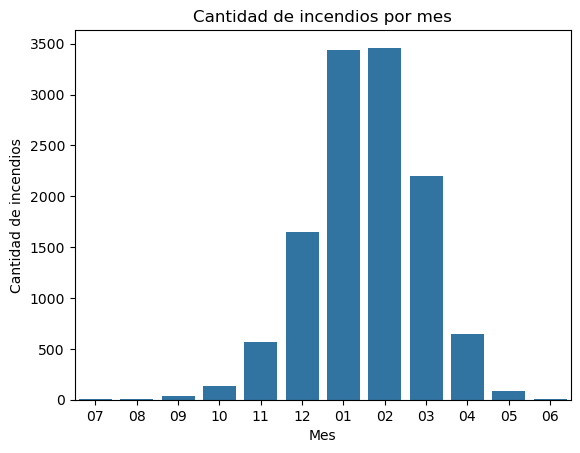

In [9]:
data = cicatrices_incedios["mes_incendio"]
orden_meses = ['07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06']

sns.countplot(data=cicatrices_incedios, x="mes_incendio", order=orden_meses)


plt.title("Cantidad de incendios por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de incendios")
plt.show()

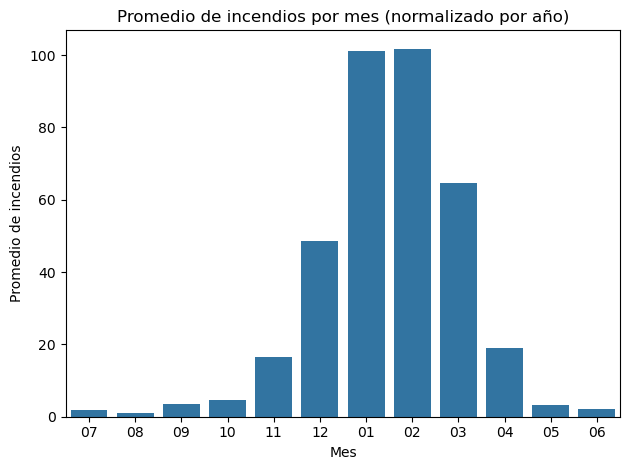

In [10]:
# Asegúrate de que las fechas estén bien
cicatrices_incedios["ign_date_conaf"] = pd.to_datetime(cicatrices_incedios["ign_date_conaf"])
cicatrices_incedios["mes_incendio"] = cicatrices_incedios["ign_date_conaf"].dt.strftime("%m")
cicatrices_incedios["anio"] = cicatrices_incedios["ign_date_conaf"].dt.year

# Contar cantidad de cicatrices_incedios por mes y año
conteo_por_mes_anio = cicatrices_incedios.groupby(["mes_incendio", "anio"]).size().reset_index(name="cantidad")

# Calcular el promedio por mes
promedio_incendios_mes = conteo_por_mes_anio.groupby("mes_incendio")["cantidad"].mean().reset_index()

# Ordenar los meses
orden_meses = ['07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06']

# Gráfico
sns.barplot(data=promedio_incendios_mes, x="mes_incendio", y="cantidad", order=orden_meses)

plt.title("Promedio de incendios por mes (normalizado por año)")
plt.xlabel("Mes")
plt.ylabel("Promedio de incendios")
plt.tight_layout()
plt.show()


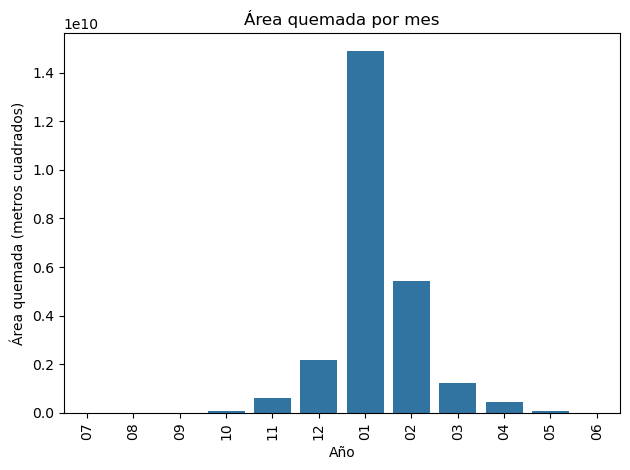

In [11]:
# Años con más cicatrices_incedios
area_mes = cicatrices_incedios.groupby("mes_incendio")["total_area"].sum()

area_mes_df = area_mes.reset_index()  # convierte Series a DataFrame

orden_meses = ['07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06']
sns.barplot(data=area_mes_df, x="mes_incendio", y="total_area", order=orden_meses)

plt.title("Área quemada por mes")
plt.xlabel("Año")
plt.ylabel("Área quemada (metros cuadrados)")
plt.xticks(rotation=90)  # gira las etiquetas del eje x si hay muchos años
plt.tight_layout()
plt.show()



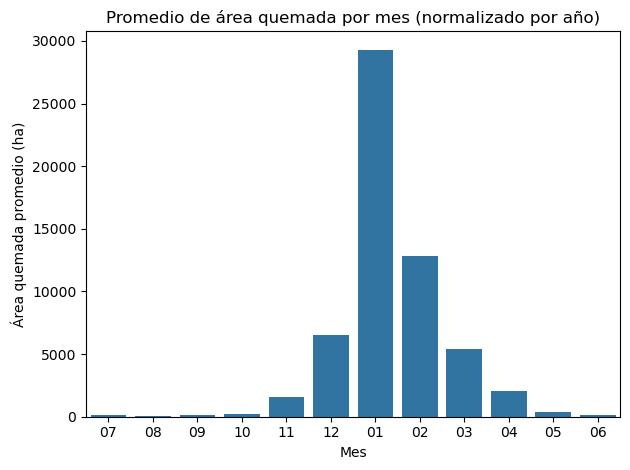

In [12]:
# Asegúrate que 'StartDate' está en datetime (ya lo tienes)
cicatrices_incedios["ign_date_conaf"] = pd.to_datetime(cicatrices_incedios["ign_date_conaf"])

# Extraer mes y año
cicatrices_incedios["mes_incendio"] = cicatrices_incedios["ign_date_conaf"].dt.strftime("%m")
cicatrices_incedios["anio"] = cicatrices_incedios["ign_date_conaf"].dt.year

# Crear tabla con área total por mes y año
area_por_mes_anio = cicatrices_incedios.groupby(["mes_incendio", "anio"])["area_conaf"].sum().reset_index()

# Ahora agrupamos solo por mes para sacar el promedio
area_mes_promedio = area_por_mes_anio.groupby("mes_incendio")["area_conaf"].mean().reset_index()

# Orden de meses
orden_meses = ['07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06']

# Gráfico
sns.barplot(data=area_mes_promedio, x="mes_incendio", y="area_conaf", order=orden_meses)

plt.title("Promedio de área quemada por mes (normalizado por año)")
plt.xlabel("Mes")
plt.ylabel("Área quemada promedio (ha)")
plt.tight_layout()
plt.show()


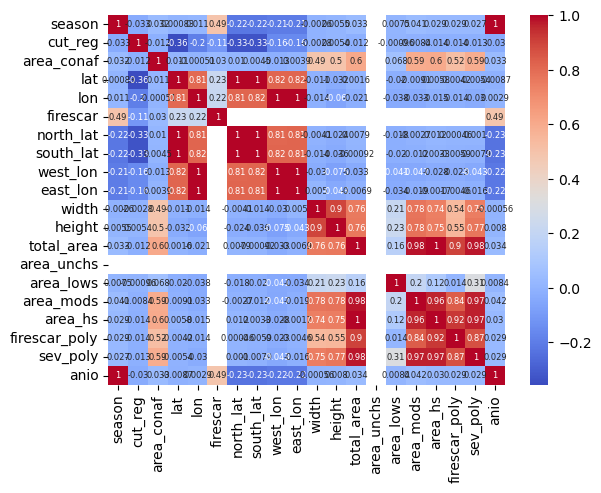

In [13]:
# Revisión de la corralación entre variables
numeric_df = cicatrices_incedios.select_dtypes(include="number")
sns.heatmap(numeric_df.corr(method="pearson"), annot=True, cmap='coolwarm', annot_kws={"size": 6})
plt.show()

mes_incendio
01    996096.36
02    437334.78
03    184588.56
04     70627.53
05     10339.10
06       844.50
07       431.60
08       283.00
09      1879.20
10      7068.90
11     54607.42
12    220603.11
Name: area_total_mes, dtype: float64


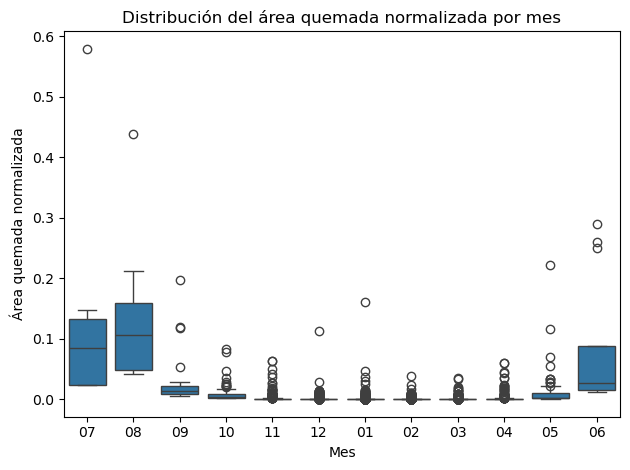

In [ ]:
# Asegurarse de que las fechas están en formato datetime
cicatrices_incedios["ign_date_conaf"] = pd.to_datetime(cicatrices_incedios["ign_date_conaf"])

# Extraer el mes del incendio
cicatrices_incedios["mes_incendio"] = cicatrices_incedios["ign_date_conaf"].dt.strftime("%m")

# Calcular el área total quemada por mes
area_total_por_mes = cicatrices_incedios.groupby("mes_incendio")["area_conaf"].sum().rename("area_total_mes")
print(area_total_por_mes)

# Unir el área total quemada por mes al DataFrame original
#cicatrices_incedios = cicatrices_incedios.merge(area_total_por_mes, on="mes_incendio")

# Normalizar el área quemada por el área total del mes
cicatrices_incedios["area_normalizada"] = cicatrices_incedios["area_conaf"] / cicatrices_incedios["area_total_mes"]

# Crear el boxplot
orden_meses = ['07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06']
sns.boxplot(data=cicatrices_incedios, x="mes_incendio", y="area_normalizada", order=orden_meses)

# Configurar el gráfico
plt.title("Distribución del área quemada normalizada por mes")
plt.xlabel("Mes")
plt.ylabel("Área quemada normalizada")
plt.tight_layout()
plt.show()

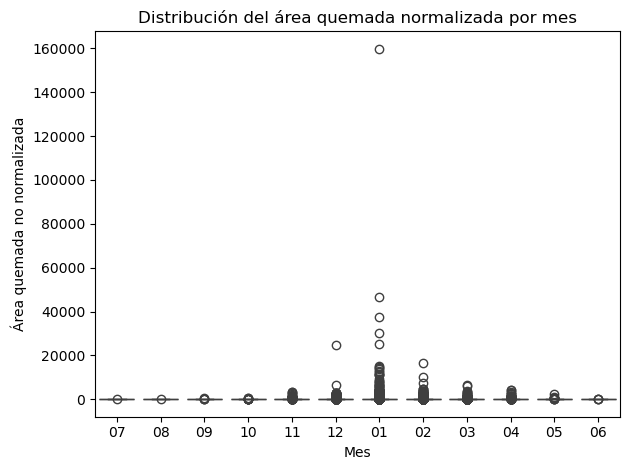

In [16]:
# Crear el boxplot
orden_meses = ['07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06']
sns.boxplot(data=cicatrices_incedios, x="mes_incendio", y="area_conaf", order=orden_meses)

# Configurar el gráfico
plt.title("Distribución del área quemada normalizada por mes")
plt.xlabel("Mes")
plt.ylabel("Área quemada no normalizada")
plt.tight_layout()
plt.show()

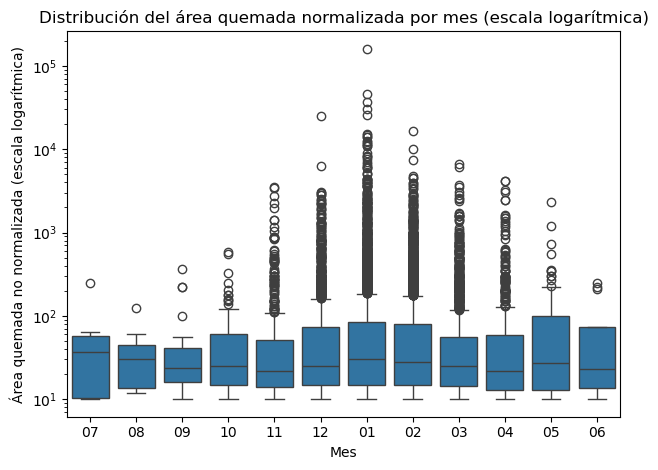

In [17]:
# Crear el boxplot
orden_meses = ['07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06']
sns.boxplot(data=cicatrices_incedios, x="mes_incendio", y="area_conaf", order=orden_meses)

# Configurar el gráfico
plt.yscale("log")  # Aplicar escala logarítmica al eje y
plt.title("Distribución del área quemada normalizada por mes (escala logarítmica)")
plt.xlabel("Mes")
plt.ylabel("Área quemada no normalizada (escala logarítmica)")
plt.tight_layout()
plt.show()

         fireID  season   code  cut_reg region_conaf         name_conaf  \
61      ID10055    1987  CL-CO        4     Coquimbo           ZAPALLAR   
321        ID11    1985  CL-CO        4     Coquimbo          LAS TACAS   
346    ID111903    2004  CL-CO        4     Coquimbo        LAS SALINAS   
377    ID111933    2004  CL-CO        4     Coquimbo           PACHINGO   
390    ID111946    2004  CL-CO        4     Coquimbo      FUNDO CARACAS   
...         ...     ...    ...      ...          ...                ...   
12037   ID98420    2003  CL-CO        4     Coquimbo   CERRILLOS POBRES   
12038   ID98421    2003  CL-CO        4     Coquimbo  LLANOS DEL LIMARI   
12039   ID98435    2003  CL-CO        4     Coquimbo            POLCURA   
12040   ID98437    2003  CL-CO        4     Coquimbo        CERRO CUTUM   
12041   ID98438    2003  CL-CO        4     Coquimbo       TALINAY BAJO   

       area_conaf ign_date_conaf ctrl_date_conaf      lat  ...      area_mods  \
61           15.0 

/tmp/ipykernel_6431/2160966729.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



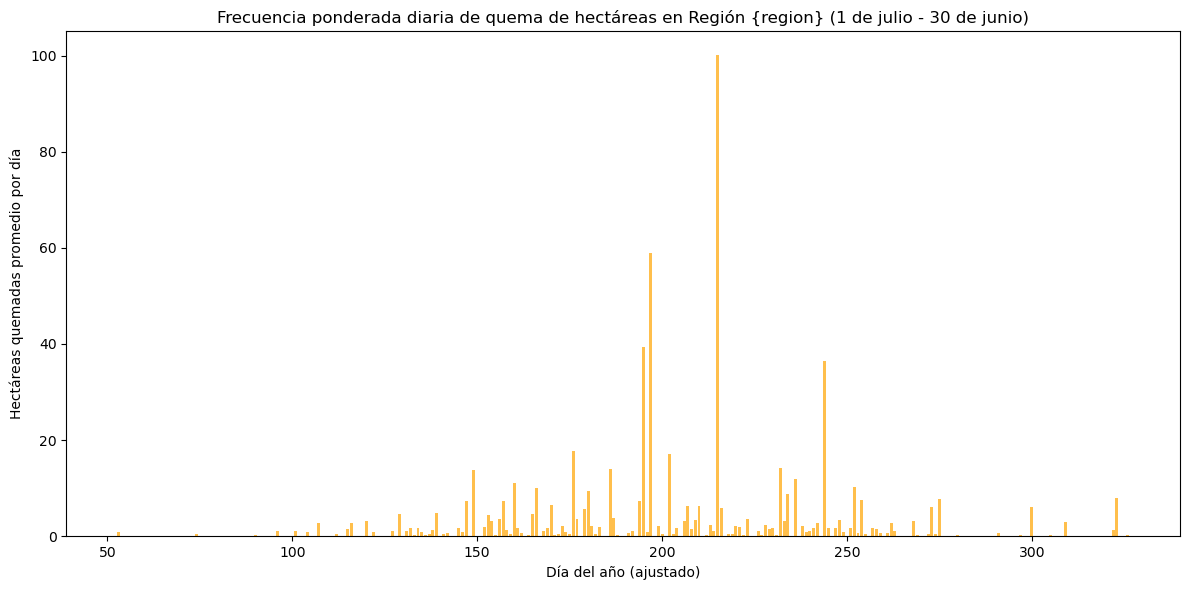

In [18]:
region = 4

# Asegurarse de que las fechas están en formato datetime
cicatrices_incedios["ign_date_conaf"] = pd.to_datetime(cicatrices_incedios["ign_date_conaf"])

# Filtrar datos para la Región 1
region_1 = cicatrices_incedios[cicatrices_incedios["cut_reg"] == region]
print(region_1)

# Crear una columna con el día del año (ajustado para que el año comience el 1 de julio)
region_1["dia_del_anio"] = (region_1["ign_date_conaf"] - pd.Timestamp(f"{region_1['ign_date_conaf'].dt.year.min()}-07-01")).dt.days % 365

# Calcular la frecuencia de incendios por día del año y normalizar por el número de años
frecuencia_dias = region_1.groupby("dia_del_anio")["area_conaf"].sum() / region_1["ign_date_conaf"].dt.year.nunique()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.bar(frecuencia_dias.index, frecuencia_dias.values, color="orange", alpha=0.7)

# Configurar el gráfico
plt.title("Frecuencia ponderada diaria de quema de hectáreas en Región {region} (1 de julio - 30 de junio)")
plt.xlabel("Día del año (ajustado)")
plt.ylabel("Hectáreas quemadas promedio por día")
plt.tight_layout()
plt.show()

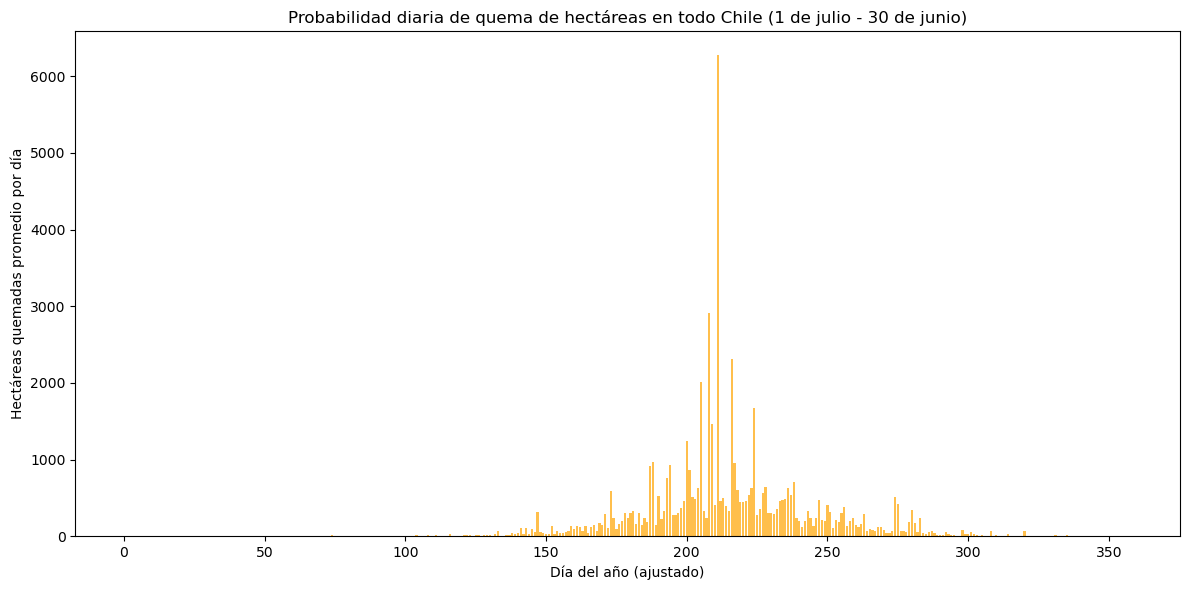

In [19]:
# Asegurarse de que las fechas están en formato datetime
cicatrices_incedios["ign_date_conaf"] = pd.to_datetime(cicatrices_incedios["ign_date_conaf"])


# Crear una columna con el día del año (ajustado para que el año comience el 1 de julio)
cicatrices_incedios["dia_del_anio"] = (cicatrices_incedios["ign_date_conaf"] - pd.Timestamp(f"{cicatrices_incedios['ign_date_conaf'].dt.year.min()}-07-01")).dt.days % 365

# Calcular la frecuencia de incendios por día del año y normalizar por el número de años
frecuencia_dias = cicatrices_incedios.groupby("dia_del_anio")["area_conaf"].sum() / cicatrices_incedios["ign_date_conaf"].dt.year.nunique()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.bar(frecuencia_dias.index, frecuencia_dias.values, color="orange", alpha=0.7)

# Configurar el gráfico
plt.title(f"Probabilidad diaria de quema de hectáreas en todo Chile (1 de julio - 30 de junio)")
plt.xlabel("Día del año (ajustado)")
plt.ylabel("Hectáreas quemadas promedio por día")
plt.tight_layout()
plt.show()

season
1985      544.088235
1986     1414.941176
1987     2210.558824
1988     1798.205882
1989     1833.058824
1990      318.970588
1991      950.558824
1992      532.852941
1993      899.117647
1994     1205.558824
1995      545.294118
1996      738.923529
1997     1088.058824
1998     1408.323529
1999     2701.794118
2000      378.662647
2001      194.970588
2002     1824.676471
2003     1054.282353
2004     1302.323529
2005     1275.264706
2006      399.323529
2007     1104.705882
2008     1012.588235
2009     1623.382353
2010     1617.529412
2011     1234.205882
2012     1975.470588
2013      342.205882
2014     2853.970588
2015     3543.147059
2016      894.470588
2017    16604.088235
2018      948.074412
Name: area_conaf, dtype: float64


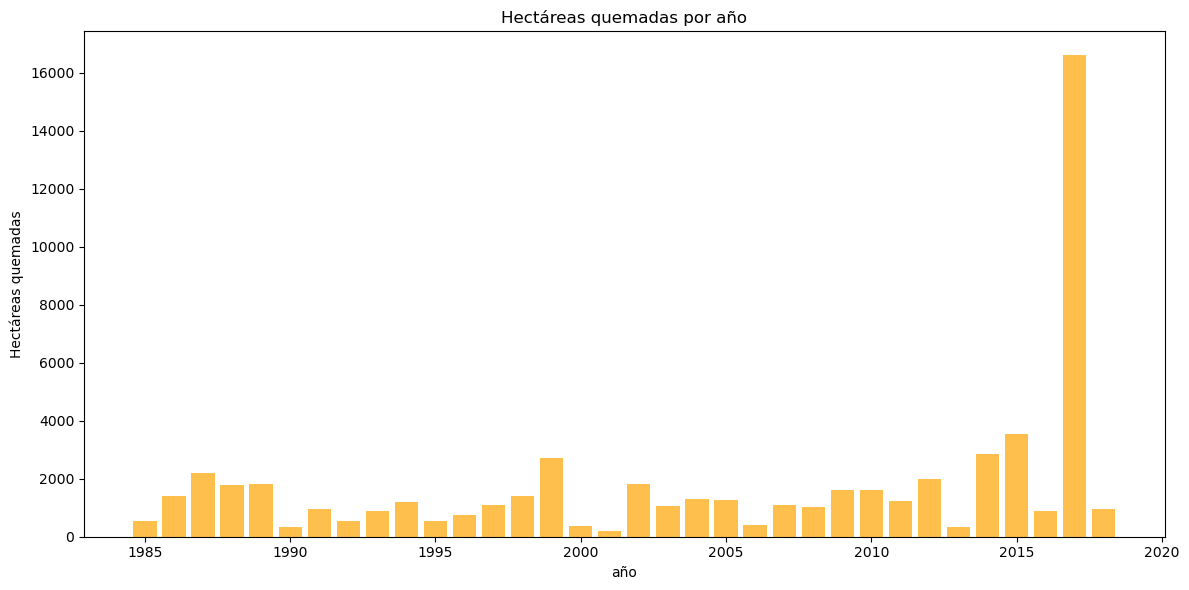

In [20]:
# Calcular la frecuencia de incendios por día del año y normalizar por el número de años
frecuencia_anio = cicatrices_incedios.groupby("season")["area_conaf"].sum() / cicatrices_incedios["season"].nunique()
print(frecuencia_anio)

# Crear el histograma

plt.figure(figsize=(12, 6))
plt.bar(frecuencia_anio.index, frecuencia_anio.values, color="orange", alpha=0.7)

# Configurar el gráfico
plt.title(f"Hectáreas quemadas por año")
plt.xlabel("año")
plt.ylabel("Hectáreas quemadas")
plt.tight_layout()
plt.show()

/tmp/ipykernel_6431/1659033585.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



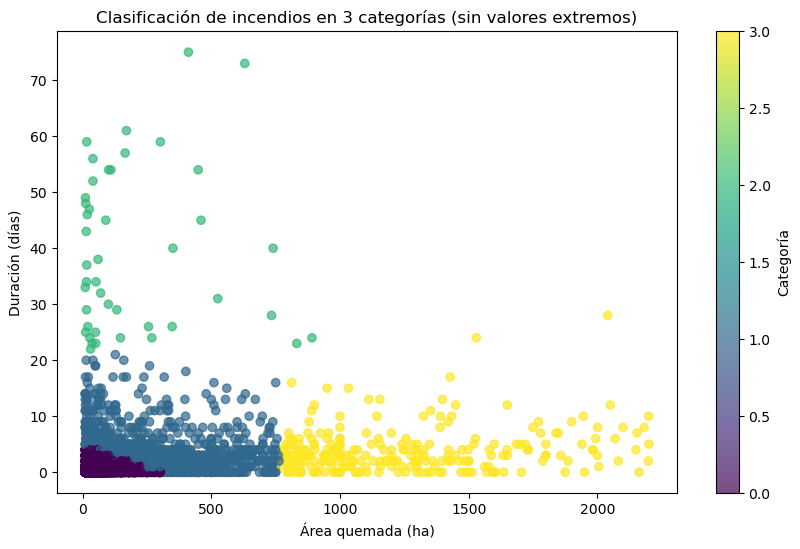

In [21]:
# Importar las librerías necesarias
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Asegurarse de que las fechas están en formato datetime
cicatrices_incedios['ign_date_conaf'] = pd.to_datetime(cicatrices_incedios['ign_date_conaf'])
cicatrices_incedios['ctrl_date_conaf'] = pd.to_datetime(cicatrices_incedios['ctrl_date_conaf'])

# Calcular la duración del incendio
cicatrices_incedios['duracion'] = (cicatrices_incedios['ctrl_date_conaf'] - cicatrices_incedios['ign_date_conaf']).dt.days

# Filtrar los datos para eliminar valores extremos
cicatrices_incedios_filtrado = cicatrices_incedios[
    (cicatrices_incedios['duracion'] >= 0) &  # Eliminar duraciones negativas
    (cicatrices_incedios['area_conaf'] <= cicatrices_incedios['area_conaf'].quantile(0.99))  # Eliminar áreas demasiado grandes (percentil 99)
]

# Seleccionar las columnas relevantes y eliminar valores nulos
features = cicatrices_incedios_filtrado[['area_conaf', 'duracion']].dropna()

# Escalar los datos para normalizar las magnitudes
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar el modelo K-Means con 3 categorías
kmeans = KMeans(n_clusters=4, random_state=42)
features['categoria'] = kmeans.fit_predict(scaled_features)

# Agregar las categorías al DataFrame original
cicatrices_incedios_filtrado['categoria'] = None
cicatrices_incedios_filtrado.loc[features.index, 'categoria'] = features['categoria']

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(features['area_conaf'], features['duracion'], c=features['categoria'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Categoría')
plt.title('Clasificación de incendios en 3 categorías (sin valores extremos)')
plt.xlabel('Área quemada (ha)')
plt.ylabel('Duración (días)')
plt.show()